In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn 
import re

In [2]:
originalDf = pd.read_csv('cybercola.csv', delimiter=',', on_bad_lines='skip') # We will skip the last line who is missing data and is not in correct format
originalDf.head()

,Unnamed: 0,Fecha,Pedido #,Ingresos netos (con formato),Estado,Tipo de cliente,Producto(s),Artículos vendidos,Cupón(es),Ingresos netos,Atribución,Número de factura
0,0,2024-07-15 23:53:14,66088,"40,00€",completed,returning,"3× Cybercola Light - Botella 33 cl., 1× Cyberc...",4,NaN,33.06,Fuente: Amigos+Cybercola+Barcelona,NaN
1,1,2024-07-15 23:16:02,66087,"40,01€",completed,returning,"2× Cybercola Cherry - Botella 33cl, 1× Cyberco...",4,NaN,33.06,Fuente: Amigos+Cybercola+Barcelona,NaN
2,2,2024-07-15 22:38:49,66085,"40,01€",recogida,returning,"2× Cybercola Cherry - Botella 33cl, 1× Cyberco...",4,NaN,33.06,Fuente: Amigos+Cybercola+Barcelona,NaN
3,3,2024-07-15 22:08:13,66083,"40,00€",completed,returning,"1× Cybercola Cherry - Botella 33cl, 2× Cyberco...",4,NaN,33.06,Fuente: Amigos+Cybercola+Barcelona,NaN
4,4,2024-07-15 22:00:16,66082,"40,00€",completed,returning,"3× Cybercola Light - Botella 33 cl., 1× Cyberc...",4,NaN,33.06,Fuente: Amigos+Cybercola+Barcelona,NaN


In [3]:
# Print of feature types
print(originalDf.dtypes)

Unnamed: 0                        int64
Fecha                            object
Pedido #                          int64
Ingresos netos (con formato)     object
Estado                           object
Tipo de cliente                  object
Producto(s)                      object
Artículos vendidos               object
Cupón(es)                       float64
Ingresos netos                   object
Atribución                       object
Número de factura               float64
dtype: object


In [4]:
unique_estado = originalDf['Estado'].unique()
unique_client_type = originalDf['Tipo de cliente'].unique()
unique_cupones = originalDf['Cupón(es)'].unique()
unique_atribucion = originalDf['Atribución'].unique()
unique_factura = originalDf['Número de factura'].unique()
unique_atribution = originalDf['Atribución'].unique()

print("Estados:\n", unique_estado)
print("Tipos cliente:\n ", unique_client_type)
print("Cupones:\n", unique_cupones)
print("Facturas:\n", unique_factura)
print('Atribución:\n', unique_atribucion)

Estados:
 ['completed' 'recogida' 'refunded' 'enrutado']
Tipos cliente:
  ['returning' 'new']
Cupones:
 [nan]
Atribuciónes:
 ['Fuente: Amigos+Cybercola+Barcelona' 'Orgánico: Google'
 'Referido: Mailchi.mp' 'Directo' 'Fuente: Google'
 'Referido: Comunidadmsm.es' 'Referido: Bing.com'
 'Administrador de la web' 'Fuente: Cyb' 'Desconocido'
 'Referido: Com.google.android.gm']
Facturas:
 [nan]
Atribución:
 ['Fuente: Amigos+Cybercola+Barcelona' 'Orgánico: Google'
 'Referido: Mailchi.mp' 'Directo' 'Fuente: Google'
 'Referido: Comunidadmsm.es' 'Referido: Bing.com'
 'Administrador de la web' 'Fuente: Cyb' 'Desconocido'
 'Referido: Com.google.android.gm']


DATA CLEAN

In [5]:
# We can see there is duplicated orders, we are going to visualize it
# Identify "Pedido #" values that are duplicated and visualize it
duplicateOrders = originalDf[originalDf.duplicated(subset=['Pedido #'], keep=False)] # We put keep as a False because we want to mantain both rows
duplicateOrders = duplicateOrders.sort_values(by='Pedido #', ascending=True)
duplicateOrders.head(10)
# As we can see most of this orders duplicated are a refund, there is different types. Most commmon is that everything is refunded
# An example would be the case of the Order = 55125 that everything was returned
# Second case is where just a part is returned
# We can also see that there could be some erros in classification of new clients, if we look at client with Pedido=55761 the second order is marked as new client
# but the original order which was in the past, was marked as a returning client, unfortunately I don't have time to dive deep into this

,Unnamed: 0,Fecha,Pedido #,Ingresos netos (con formato),Estado,Tipo de cliente,Producto(s),Artículos vendidos,Cupón(es),Ingresos netos,Atribución,Número de factura
9005,9005,2023-11-15 16:27:28,55125,"30,00€ 0,00€",refunded,returning,"2× Cybercola Cherry - Botella 33cl, 1× Cyberco...",3,NaN,24.79,Desconocido,NaN
8808,8808,2023-11-16 10:29:38,55125,"30,00€ 0,00€",refunded,returning,"2× Cybercola Cherry - Botella 33cl, 1× Cyberco...",0,NaN,'-30,Desconocido,NaN
8617,8617,2023-11-17 17:49:18,55552,"24,63€ 0,00€",refunded,returning,1× Cybercola Zero - Lata 33cl,0,NaN,'-24.63,Desconocido,NaN
8631,8631,2023-11-17 15:49:22,55552,"24,63€ 0,00€",refunded,new,1× Cybercola Zero - Lata 33cl,1,NaN,12.09,Desconocido,NaN
7487,7487,2023-12-21 22:24:56,55721,"80,00€ 60,00€",completed,returning,7× Cybercola Txirene,0,NaN,0,Desconocido,NaN
8501,8501,2023-11-19 17:41:16,55721,"80,00€ 60,00€",completed,new,7× Cybercola Txirene,7,NaN,57.85,Desconocido,NaN
8465,8465,2023-11-19 21:39:56,55761,"20,00€ 10,00€",completed,new,"1× Cybercola Bilbao Basket, 1× Cybercola Light...",2,NaN,16.52,Desconocido,NaN
7490,7490,2023-12-21 21:20:18,55761,"20,00€ 10,00€",completed,returning,"1× Cybercola Bilbao Basket, 1× Cybercola Light...",'-1,NaN,'-8.26,Desconocido,NaN
8424,8424,2023-11-23 17:41:29,55817,"29,00€ 0,00€",refunded,returning,1× Cybercola Zero - Lata 33cl,0,NaN,'-29,Desconocido,NaN
8426,8426,2023-11-23 16:10:07,55817,"29,00€ 0,00€",refunded,new,1× Cybercola Zero - Lata 33cl,1,NaN,15.7,Desconocido,NaN


In [6]:
# First we will format Ingresos netos(con formato) column to be numerical, and have the same aspect as Ingresos netos to compare 

# We can see that there is rows where Ingresos netos(con formato) have more than one number, this is because most of them are refunds,
# So we interpret that it is the final balance of the operation. E.g if we are refunding an order of 30€ the numbers would be '30,00€ 0,00€'
# Because 30 will be the amount returned and the final balance of the operation would be +30 -30 = 0.
# So before format Ingresos netos con format we will put this into a new column called 'Balance final'

df_cleaned = originalDf.copy()

df_cleaned['Ingresos netos (con formato)'] = df_cleaned['Ingresos netos (con formato)'].replace({'€': '', ',': '.'}, regex=True)
df_cleaned['Ingresos netos (limpios)'] = df_cleaned['Ingresos netos (con formato)'].str.extract(r'(\d+\.\d+)', expand=False).astype(float)
df_cleaned['Balance final'] = df_cleaned['Ingresos netos (con formato)'].str.extract(r'\d+\.\d+\s+(\d+\.\d+)', expand=False).astype(float)
rows_with_balance = df_cleaned[df_cleaned['Balance final'].notna()]

print(rows_with_balance[['Ingresos netos (con formato)', 'Ingresos netos (limpios)', 'Balance final']])


     Ingresos netos (con formato)  Ingresos netos (limpios)  Balance final
210                    30.00 0.00                     30.00            0.0
515                  140.00 80.00                    140.00           80.0
522                  140.00 80.00                    140.00           80.0
627                   35.50 34.50                     35.50           34.5
666                   138.00 0.00                    138.00            0.0
...                           ...                       ...            ...
8501                  80.00 60.00                     80.00           60.0
8617                   24.63 0.00                     24.63            0.0
8631                   24.63 0.00                     24.63            0.0
8808                   30.00 0.00                     30.00            0.0
9005                   30.00 0.00                     30.00            0.0

[120 rows x 3 columns]


In [7]:
df_cleaned['Fecha'] = pd.to_datetime(df_cleaned['Fecha'], errors='coerce') # Convert 'Fecha' to datetime

The features collected are:

**Fecha**: the date of the order

**Pedido #**: id of the order

**Ingresos netos(con formato)**: net income before taxes and discounts(this include the VAT of 21%)

**Estado**: state of the order, it could be completed, recogida, refunded or enrutado
Completed -> the order was delivered successfully
Recogida -> Awaiting 

**Tipo de cliente**: type of client that makes the order, it could be returning or new

**Producto(s)**: name of products included in the order, is a string of strings sepparated by ','

**Artículos vendidos**: number of items sold in the order, it counts de number of products

**Cupón(es)**: discount code, all Nan

**Ingresos netos**: net income after taxes and discounts

**Atribución**: source of the client order

**Número de factura**: number of the bill, all Nan

In [8]:
# Split the 'Producto(s)' column by separator ',' explode into individual rows and count them
allProducts = originalDf['Producto(s)'].str.split(',').explode().str.strip() # Last strip is for the case there is white spaces
productCounts = allProducts.value_counts().reset_index()
productCounts.columns = ['Product', 'Count']
print(productCounts)


                                  Product  Count
0          1× Cybercola Light - Lata 33cl   1138
1     1× Cybercola Light - Botella 33 cl.   1136
2      1× Cybercola Cherry - Botella 33cl   1123
3         1× Cybercola Cherry - Lata 33cl   1027
4        1× Cybercola Zero - Botella 33cl    946
..                                    ...    ...
216   28× Cybercola Cherry - Botella 33cl      1
217  44× Cybercola Light - Botella 33 cl.      1
218       7× Cybercola Cherry - Lata 33cl      1
219      1× Caja Regalo 2023-  3 botellas      1
220     55× Cybercola Zero - Botella 33cl      1

[221 rows x 2 columns]


In [10]:
expandedProducts = []

for item in allProducts:
    if isinstance(item, str): # Check is not Nan
        parts = item.split('×') if '×' in item else item.split('x') # Extract x or ×
        #TODO: check two digits and negative
        if len(parts) > 1 and parts[0].isdigit(): # We know that first character will be the number of articles
            quantity = int(parts[0].strip())
            productName = parts[1].strip()
        else:
            quantity = 1
            productName = item.strip()

        expandedProducts.extend([productName] * quantity)

expandedProductsDf = pd.DataFrame(expandedProducts, columns=['Product'])

# Count appeared times of each product
productCounts = expandedProductsDf['Product'].value_counts().reset_index()
productCounts.columns = ['Product', 'Count']
print(productCounts)

                                              Product  Count
0                          Cybercola Zero - Lata 33cl   6348
1                        Cybercola Cherry - Lata 33cl   4912
2                    Cybercola Light - Botella 33 cl.   4846
3                       Cybercola Zero - Botella 33cl   4795
4                     Cybercola Cherry - Botella 33cl   4633
5                         Cybercola Light - Lata 33cl   4595
6                                          Cyberpepsi   1013
7                                      Cybercola Pika   1001
8                          Cybercola Pack experiencia    802
9                                   Cybercola Txirene    761
10          Cybercola Zero – Lata 33cl Edición Verano    663
11                        LA GILDA DEL NORTE (anchoa)    556
12                LA GILDA DEL NORTE (anchoa picante)    453
13                     Cybercola Zero - Cuarto (25cl)    449
14                                 Cybercola Sirimiri    368
15                    Ca

In [11]:
# MIRAR NEGATIUS, ALOMILLOR NO ELS HAURIA DE COMPTAR COM A PEDIDOS

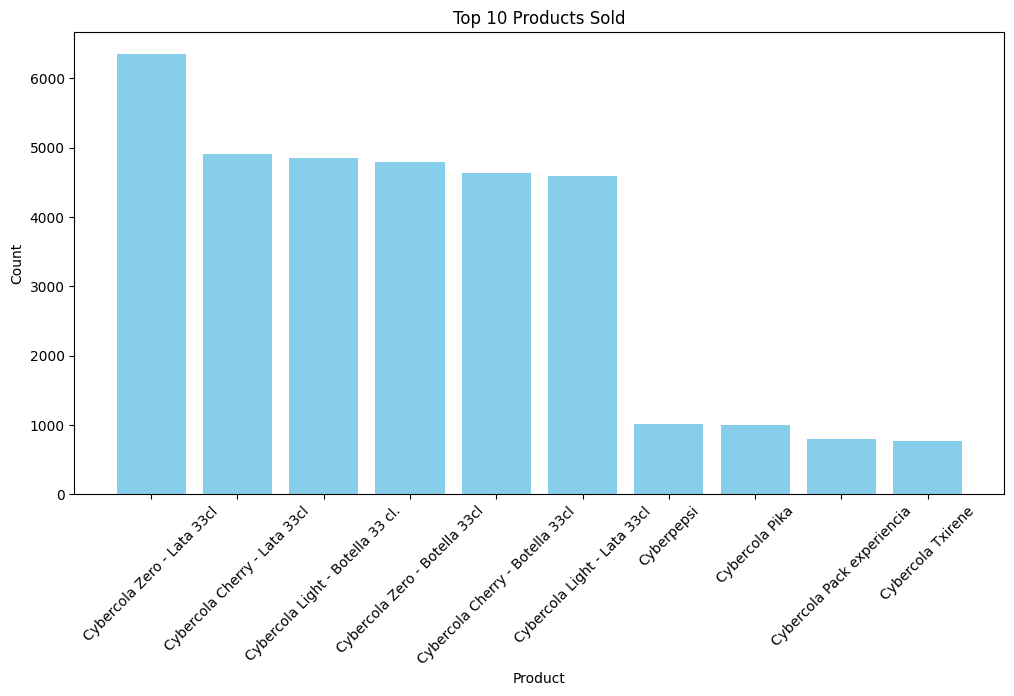

In [12]:
# Sort products by count and select the top 10 for visualization
top_products = productCounts.sort_values(by='Count', ascending=False).head(10)

# Plotting the top 10 products
plt.figure(figsize=(12, 6))
plt.bar(top_products['Product'], top_products['Count'], color='skyblue')
plt.xlabel('Product')
plt.ylabel('Count')
plt.title('Top 10 Products Sold')
plt.xticks(rotation=45)
plt.show()


As I don't have customer_id or anything to associate each order to a customer I approach this problem.
If we had a column with CIF or NIF, we would count the unique values and we will obtain the number of customers, for the average purchase we will group by CIF/NIF and calculate the average of each customer, once we have each average we would calculate the total average and deviation from it

In [98]:
# Drop the oldest duplicate order because it will be a refun, and keep the original to don't count the refund as another order
df_cleaned_sorted = df_cleaned.sort_values(by='Fecha', ascending=True)
df_unique_pedidos = df_cleaned_sorted.drop_duplicates(subset=['Pedido #'], keep='first')
# Drop the rows where the cost income was 0€
df_filtered = df_unique_pedidos[df_unique_pedidos['Ingresos netos (limpios)'] > 0]


In [21]:
# First of all, we count the number of new clients
# For this I substracted the refund rows, so I interpreted that if not I would be counting twice the same client
noRefundDf = df_filtered[df_filtered['Estado'] != 'refunded']
newCustomersCount = noRefundDf[noRefundDf['Tipo de cliente'] == 'new'].shape[0]
returningCustomersCount = noRefundDf[noRefundDf['Tipo de cliente'] != 'new'].shape[0]

print("Number of new clients", newCustomersCount)
print("Number of returning clients", returningCustomersCount)          

Number of new clients 2751
Number of returning clients 6250


As we don't have anything to grup orders by customer, at this point it makes more sense to sepparate data with Persons and Restaurants. For this we're going to invent an heuristic. Documenting on internet, the average consumption of drinks per Spanish citizen is 46.7L per year. This makes an average of 140 cans per year, which is a dozen per month. We will count that those who repeat ordering with us, make an order every two months, and is for two persons so we will count orders of less than 4packs as personal orders. This makes a bit larger, with problems like no all the cans are 33cl size, or there is other products like Gildas or T-shirts... and to optimize the time to make other analysis I will assume that orders above 40€ will be from bars and under 40€ for persons clients

Source: https://www.mercasa.es/wp-content/uploads/2023/02/02-Consumo-de-bebidas-refrescantes-en-Espana.pdf

In [27]:
dfBars = noRefundDf[noRefundDf['Ingresos netos (limpios)'] > 40]
dfPersons = noRefundDf[noRefundDf['Ingresos netos (limpios)'] <= 40]
print("Number of persons orders", dfPersons.shape[0])
print("Number of bars orders",dfBars.shape[0])

Number of persons orders 5626
Number of bars orders 3375


In [70]:
def estimate_customers(df, repeat_probs):
    df = df.copy()
    
    # Add a new column to classify by month
    df.loc[:, 'MonthYear'] = df['Fecha'].dt.to_period('M')
    
    # Initialize a dictionary to store monthly results
    monthly_customers = {}
    
    # Initialize a list to track recurrent customers for the previous 4 months
    recurrent_counts = [0, 0, 0, 0]
    
    for month in sorted(df['MonthYear'].unique()):
        # Filter data for the current month and count new customers
        current_month_df = df[df['MonthYear'] == month]
        new_customers = current_month_df[current_month_df['Tipo de cliente'] == 'new'].shape[0]
        
        # Calculate returning customers for the current month based on the probabilities of recurrency
        recurrent_customers = int(sum([recurrent_counts[i] * repeat_probs[i] for i in range(len(recurrent_counts))]))
        total_returning = current_month_df[current_month_df['Tipo de cliente'] == 'returning'].shape[0]
        estimated_new_customers = max(total_returning - recurrent_customers, 0) + new_customers
        
        # Update recurrent counts for next month
        recurrent_counts = [estimated_new_customers] + recurrent_counts[:-1]       
        monthly_customers[str(month)] = {
            'new_customers': new_customers,
            'recurrent_customers': recurrent_customers,
            'total_customers': estimated_new_customers + recurrent_customers,
            'total_new_customers': estimated_new_customers 
        }
    
    # Showing the table
    monthly_customers_df = pd.DataFrame.from_dict(monthly_customers, orient='index')
    print(monthly_customers_df)

    # Plot
    monthly_customers_df['total_customers'].plot(kind='bar', figsize=(12, 6), color='skyblue', edgecolor='black')
    plt.xlabel('Month')
    plt.ylabel('Estimated Number of Customers')
    plt.title('Estimated Customers per Month')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    return monthly_customers_df

         new_customers  recurrent_customers  total_customers  \
2023-11            177                    0              545   
2023-12            153                   65              831   
2024-01             82                  228              491   
2024-02            204                  277              555   
2024-03            272                  202              568   
2024-04            547                  178             1223   
2024-05            100                  257              365   
2024-06            224                  324              736   
2024-07             31                  199              312   

         total_new_customers  
2023-11                  545  
2023-12                  766  
2024-01                  263  
2024-02                  278  
2024-03                  366  
2024-04                 1045  
2024-05                  108  
2024-06                  412  
2024-07                  113  


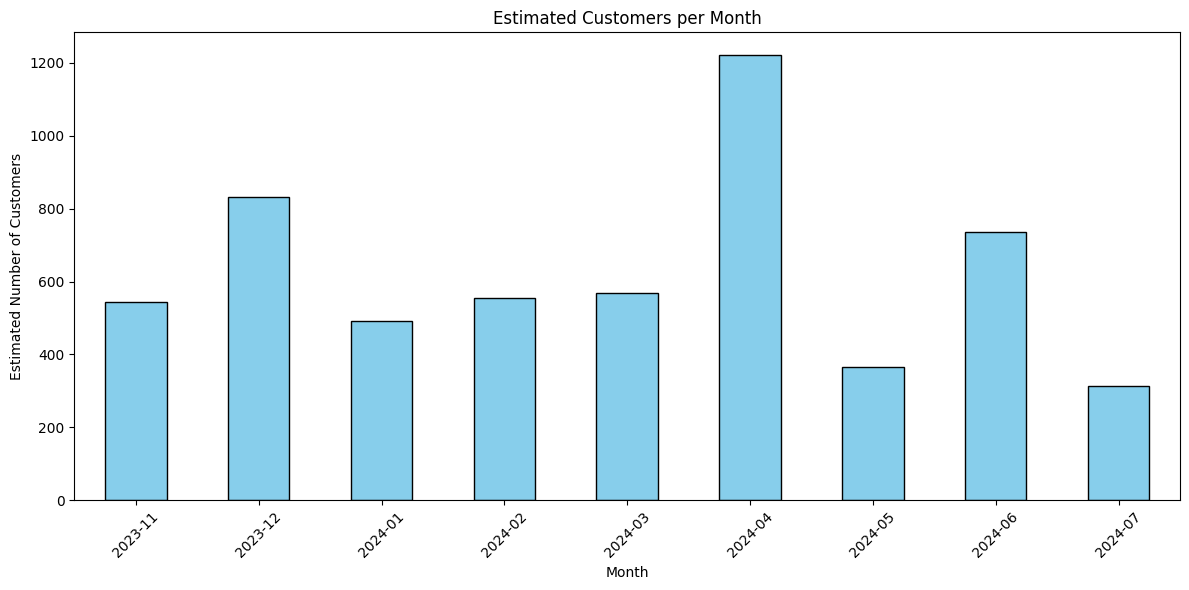

Total new customers:  3896


In [66]:
monthly_customers_df_persons = estimate_customers(dfPersons, [0.12, 0.25, 0.10, 0.05])
# Sum of the 'total_new_customers' column from the DataFrame
total_new_customers_sum = monthly_customers_df_persons['total_new_customers'].sum()
print("Total new customers: ", total_new_customers_sum)


         new_customers  recurrent_customers  total_customers  \
2023-11             75                    0              230   
2023-12             29                   92              206   
2024-01             35                   91              179   
2024-02             83                   92              329   
2024-03            178                  129              370   
2024-04            338                  157              760   
2024-05             74                  324              463   
2024-06            119                  212              609   
2024-07             30                  277              307   

         total_new_customers  
2023-11                  230  
2023-12                  114  
2024-01                   88  
2024-02                  237  
2024-03                  241  
2024-04                  603  
2024-05                  139  
2024-06                  397  
2024-07                   30  


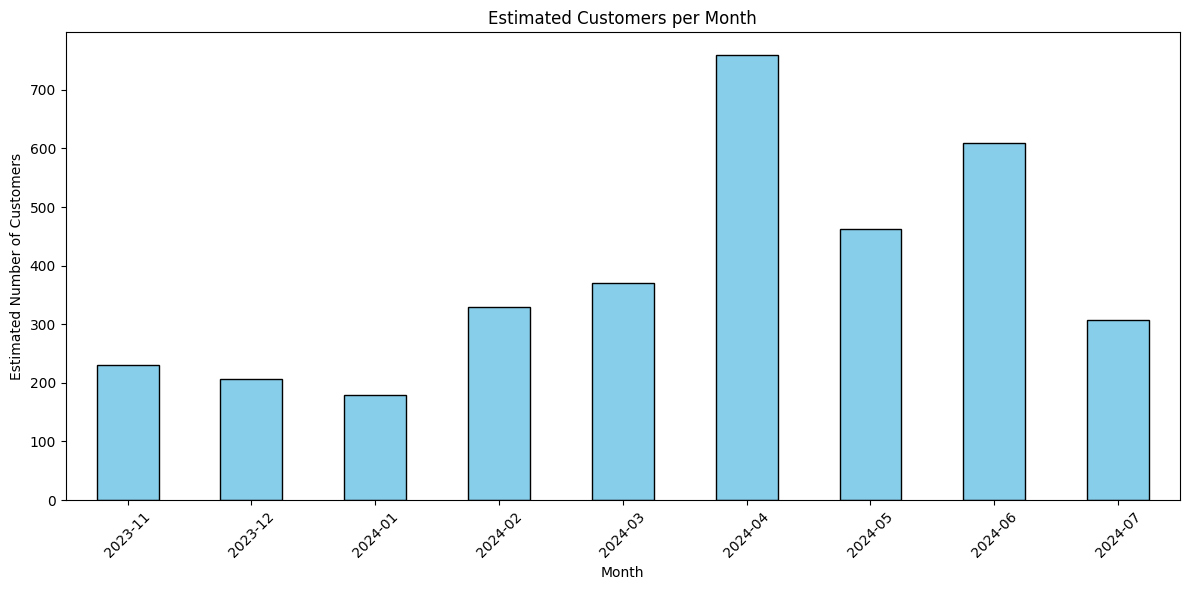

Total new customers:  2079


In [67]:
monthly_customers_df_bars = estimate_customers(dfBars, [0.4, 0.2, 0.15, 0])
# Sum of the 'total_new_customers' column from the DataFrame
total_new_customers_sum = monthly_customers_df_bars['total_new_customers'].sum()
print("Total new customers: ", total_new_customers_sum)


In [16]:
# Calculate the mean and standard deviation of 'Ingresos netos (limpios)'
mean = df_filtered['Ingresos netos (limpios)'].mean()
std_dev = df_filtered['Ingresos netos (limpios)'].std()

print(f"Mean of 'Ingresos netos (limpios)': {mean}")
print(f"Standard Deviation of 'Ingresos netos (limpios)': {std_dev}")

Mean of 'Ingresos netos (limpios)': 44.230875996457044
Standard Deviation of 'Ingresos netos (limpios)': 37.93649808131454


We want to visualize how the orders are distributed, so we will make a plot to visualize it by ranges

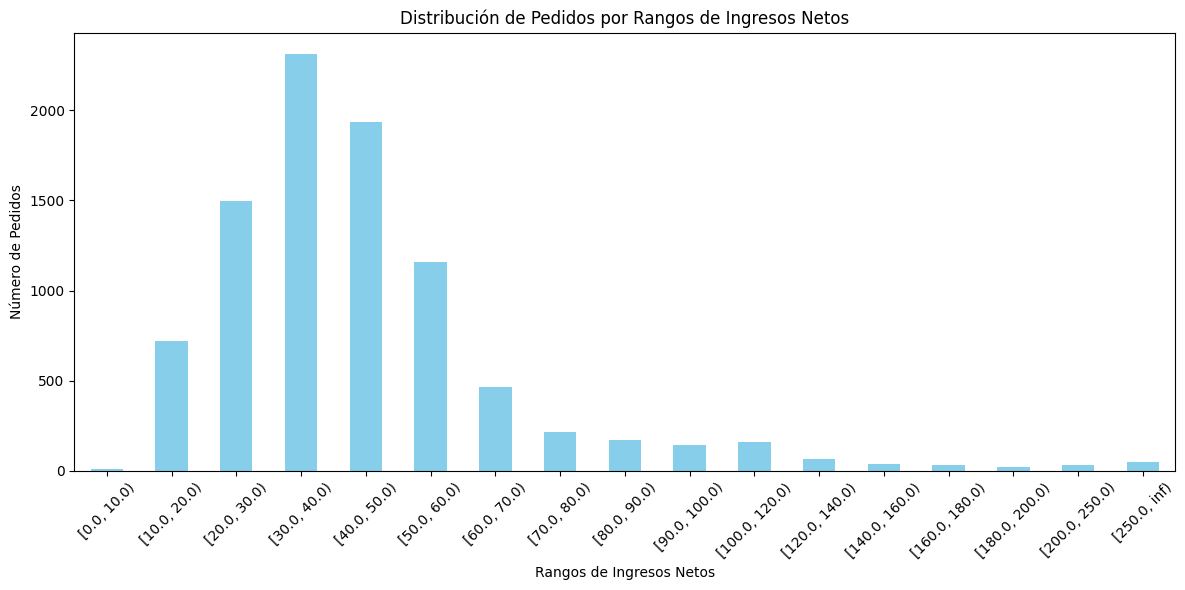

Ingresos_bins
[0.0, 10.0)         10
[10.0, 20.0)       721
[20.0, 30.0)      1496
[30.0, 40.0)      2313
[40.0, 50.0)      1934
[50.0, 60.0)      1156
[60.0, 70.0)       465
[70.0, 80.0)       218
[80.0, 90.0)       171
[90.0, 100.0)      142
[100.0, 120.0)     161
[120.0, 140.0)      68
[140.0, 160.0)      41
[160.0, 180.0)      33
[180.0, 200.0)      20
[200.0, 250.0)      32
[250.0, inf)        51
Name: count, dtype: int64


In [17]:
incomeBinsDf = df_filtered.copy()

# Create a new column 'Ingresos_bins' to categorize the income in their category
bins = list(range(0, 101, 10)) + list(range(100, 201, 20)) + [200, 250, float('inf')]
incomeBinsDf['Ingresos_bins'] = pd.cut(incomeBinsDf['Ingresos netos (limpios)'], bins=bins, right=False, labels=None, duplicates='drop')

# Count the number of orders in each bin
orders_count = incomeBinsDf['Ingresos_bins'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
orders_count.plot(kind='bar', color='skyblue')
plt.xlabel('Rangos de Ingresos Netos')
plt.ylabel('Número de Pedidos')
plt.title('Distribución de Pedidos por Rangos de Ingresos Netos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print(orders_count)


                                            Product  Count
19                          Camiseta Cybercola - XL      5
20  DESCUENTO ESPECIAL POR ENTREGA ERRONEA ANTERIOR      2
21                           Camiseta Cybercola - L      2
22                           Camiseta Cybercola - M      2
23                    Caja Regalo 2023-  3 botellas      1
24                      Balon Oficial Bilbao Basket      1
25             Caja Regalo Cybercola Sirimiri (7ud)      1
27                         Camiseta Cybercola promo      1


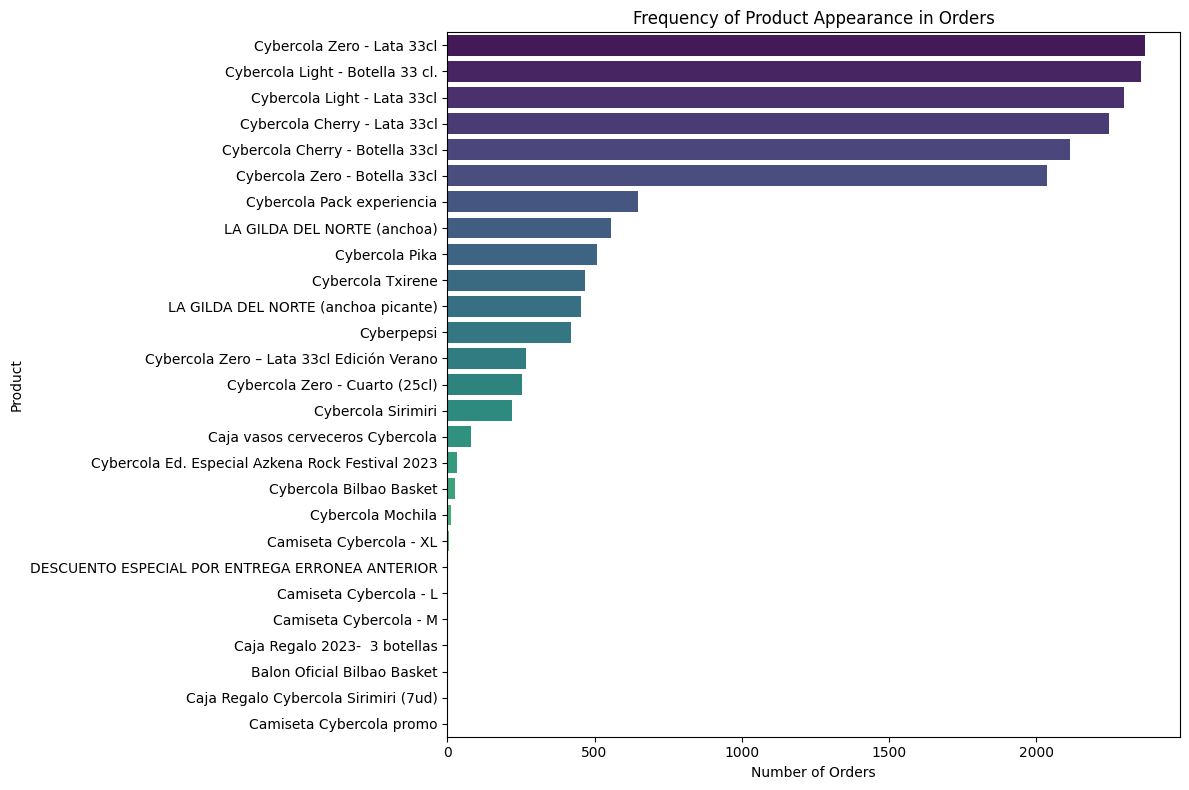

In [103]:
# Calculate the frequency of product appearance in orders"
# We are starting from df_unique_pedidos to don't count twice in refund orders
allProducts = df_unique_pedidos['Producto(s)'].str.split(',').explode().str.strip() # Last strip is for the case there is white spaces

def clean_product_name(product):
    if isinstance(product, str):
        # Use regex to remove quantity prefix (e.g., '3× ', '2x ') only at the start of the string and not in the middle
        return re.sub(r'^\d+\s*[×x]\s*', '', product).strip()
    return product

allProductsCleaned = allProducts.apply(clean_product_name) # Apply to each row

# Count the frequency of each product
productCounts = allProductsCleaned.value_counts().reset_index()
productCounts.columns = ['Product', 'Count']
# Manually remove the product entry with '-114× Cyberpepsi'
productCounts_cleaned = productCounts[productCounts['Product'] != '-114× Cyberpepsi']
print(productCounts_cleaned.tail(8))

# Visualization sorted
productCounts_sorted = productCounts_cleaned.sort_values(by='Count', ascending=False)
plt.figure(figsize=(12, 8))
sns.barplot(data=productCounts_sorted, x='Count', y='Product', hue='Product', dodge=False, palette='viridis', legend=False)
plt.xlabel('Number of Orders')
plt.ylabel('Product')
plt.title('Frequency of Product Appearance in Orders')
plt.tight_layout()
plt.show()
